In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 432s 3us/step


In [3]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [4]:
def show_image(X,y):
    plt.imshow(X)
    plt.xlabel(labels[y])

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_train = y_train.reshape(-1,)

In [13]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

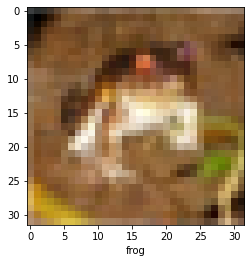

In [14]:
show_image(X_train[0],y_train[0])

In [18]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [36]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.8688 - accuracy: 0.3275
Epoch 2/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.6584 - accuracy: 0.4043
Epoch 3/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.5851 - accuracy: 0.4324
Epoch 4/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.5394 - accuracy: 0.4457
Epoch 5/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5043 - accuracy: 0.4597
Epoch 6/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4662 - accuracy: 0.4750
Epoch 7/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4469 - accuracy: 0.4836
Epoch 8/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4229 - accuracy: 0.4903
Epoch 9/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.3992 - accuracy: 0.4990
Epoch 10/10
1563/1563 [==============================] 

In [41]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.4433 - accuracy: 0.4968


[1.4433447122573853, 0.4968000054359436]

In [42]:
y_pred = ann.predict(X_test)
y_preds = [np.argmax(i) for i in y_pred]
y_preds[:5]

[3, 9, 0, 8, 4]

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.57      0.54      0.55      1000
           1       0.65      0.55      0.60      1000
           2       0.41      0.31      0.35      1000
           3       0.35      0.32      0.33      1000
           4       0.44      0.39      0.41      1000
           5       0.40      0.42      0.41      1000
           6       0.48      0.60      0.53      1000
           7       0.51      0.62      0.56      1000
           8       0.67      0.59      0.63      1000
           9       0.51      0.63      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



In [35]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5258 - accuracy: 0.4466
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1456 - accuracy: 0.5944
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0038 - accuracy: 0.6483
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9066 - accuracy: 0.6821
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8384 - accuracy: 0.7074
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7828 - accuracy: 0.7272
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7352 - accuracy: 0.7411
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6938 - accuracy: 0.7572
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6553 - accuracy: 0.7706
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [40]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.9017 - accuracy: 0.7015


[0.9016531109809875, 0.7014999985694885]

In [38]:
y_pred_cnn = cnn.predict(X_test)
y_preds_cnn = [np.argmax(i) for i in y_pred_cnn]
y_preds_cnn[:5]

[3, 8, 8, 0, 6]

In [39]:
print(classification_report(y_test,y_preds_cnn))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.79      0.84      0.81      1000
           2       0.61      0.58      0.60      1000
           3       0.53      0.52      0.52      1000
           4       0.63      0.70      0.66      1000
           5       0.66      0.56      0.60      1000
           6       0.75      0.78      0.77      1000
           7       0.72      0.77      0.74      1000
           8       0.82      0.77      0.79      1000
           9       0.82      0.74      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

